In [1]:
import engine as ng
import test_suite as tst
import matplotlib.pyplot as plt

In [2]:
## Diagnostics de performance
import numpy as np
def diffAbs(uFinal,uRef):
	return (1/uFinal.shape[0]**.5)*np.sum((uFinal - uRef)**2)**.5

In [3]:
def conservation(uFinal,uRef,scheme):
	integ0 = 2*np.sum(uFinal*scheme.dx)
	integ1 = 2*np.sum(uRef*scheme.dx)
	return integ1 - integ0

test 1

Erreur RMS:  0.21440158780274027
Erreur de conservation :  2.7755575615628914e-17


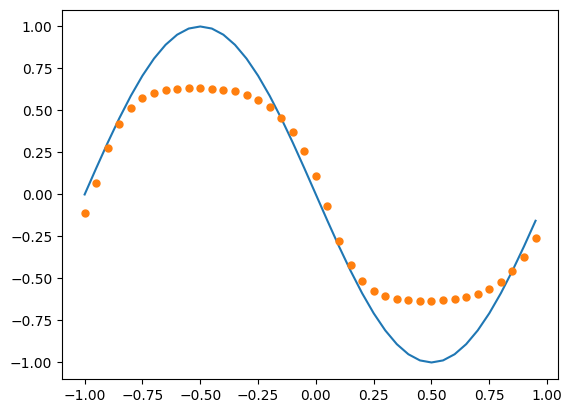

In [4]:
test = tst.Test1()
scheme = ng.MUSCL(test)
scheme.form = "KT"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

Erreur RMS:  0.20444207312020085
Erreur de conservation :  -6.591949208711867e-16


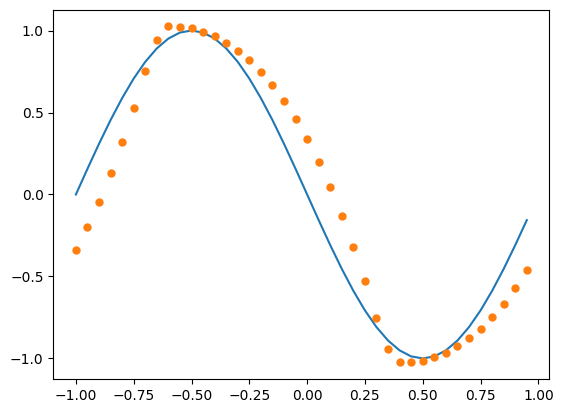

In [5]:
test = tst.Test1()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 2

Erreur RMS:  0.17769229991244434
Erreur de conservation :  -2.220446049250313e-16


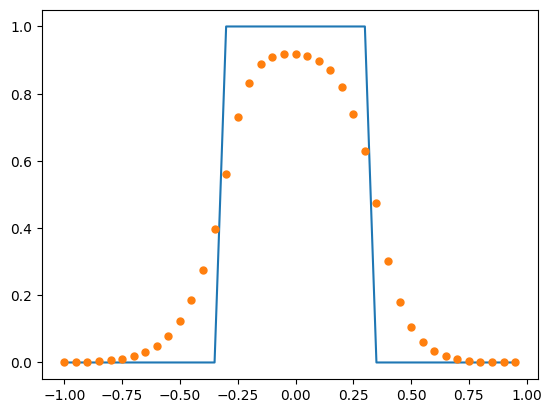

In [6]:
test = tst.Test2()
scheme = ng.MUSCL(test)
scheme.form = "KT"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

Erreur RMS:  0.19734489076560746
Erreur de conservation :  4.440892098500626e-16


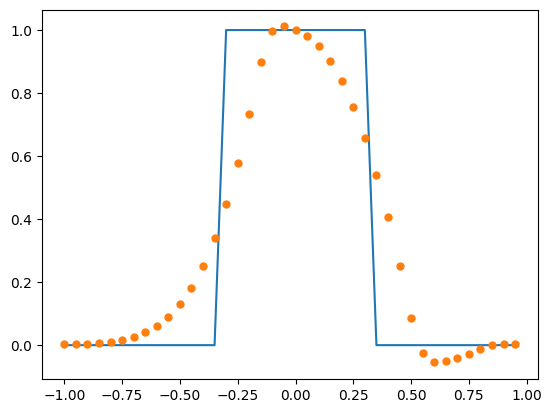

In [7]:
test = tst.Test2()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 3

In [1]:
test = tst.Test3()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

NameError: name 'tst' is not defined

test 4

Erreur RMS:  0.04991505332859551
Erreur de conservation :  0.0


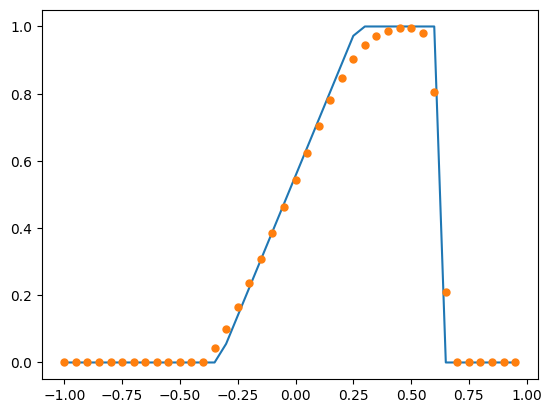

In [8]:
test = tst.Test4()
scheme = ng.MUSCL(test)
scheme.form = "KT"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 4 - interpolation du 2nd ordre

Erreur RMS:  0.05207134289530343
Erreur de conservation :  2.220446049250313e-16


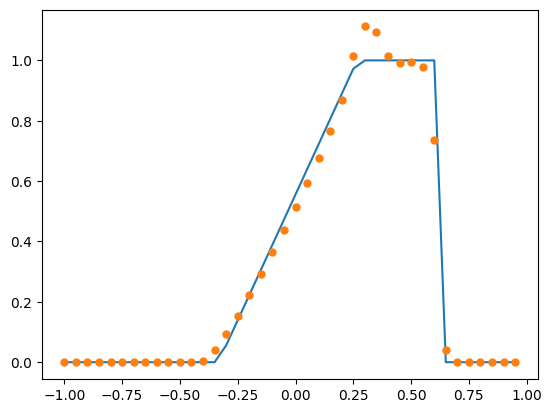

In [9]:
test = tst.Test4()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 5

Erreur RMS:  0.06595042209738546
Erreur de conservation :  0.0


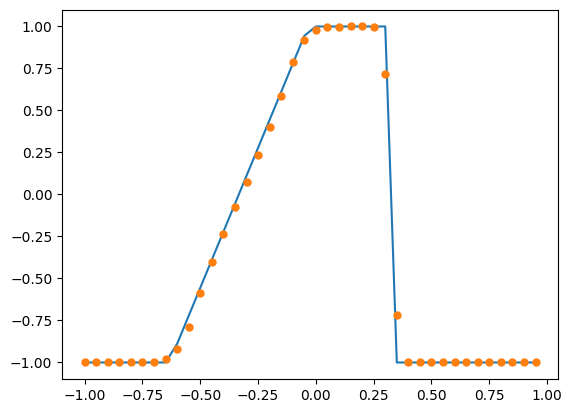

In [10]:
test = tst.Test5()
scheme = ng.MUSCL(test)
scheme.form = "KT"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

test 5 - interpolation du 2nd ordre

Erreur RMS:  0.06436941093293594
Erreur de conservation :  -2.220446049250313e-16


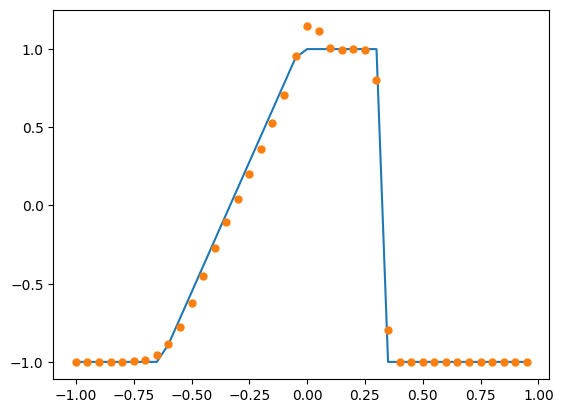

In [11]:
test = tst.Test5()
scheme = ng.MUSCL(test)
scheme.form = "KTparabolic"
scheme.compute(scheme.tFinal)
plt.plot(scheme.x, scheme.uFinal)
plt.plot(scheme.x, scheme.uF, marker = "o", markersize=5, linestyle = "None")

print("Erreur RMS: ", diffAbs(scheme.uFinal,scheme.uF))
print("Erreur de conservation : ", conservation(scheme.uF,scheme.u0(scheme.x),scheme))

Nous implémentons la variante de Kurganov-Tadmor du schéma MUSCL. Ce schéma ne comporte pas de solveur de Riemann et fait usage d'un limiteur de flux. Ce schéma reconstruit les flux par interpolation. [source ?]

Ainsi, nous identifions trois paramètres principaux influant sur la qualité des simulations : la condition de CFL, le choix du flux limiter, et l'ordre de l'interpolation lors de la reconstruction. Pour évaluer la qualité des simulations, nous utilisons deux mesures : la variance de l'erreur à la solution analytique et l'erreur sur la conservation de l'inconnue u, dont l'intégrale doit rester constante.

## CFL = 0.8

Pour que l'ensemble des tests convergent, nous sommes contraints d'implémenter une intégration en temps de Runge-Kutta 4. Dès lors

- Pour l'équation d'advection, l'erreur RMS demeure importante (~ 0.4 quel que soit le flux limiter). La performance de la reconstruction linéaire et meilleure dans ce cas.

- Pour l'équation de Burgers, la reconstruction du second ordre offre au countraire une meilleure performance.

- Dans tous les cas, l'erreur de conservation est de l'ordre de l'erreur machine (~ $10^{-16}$)

## CFL = 0.5

Diminuer le CFL nous permet d'utiliser le schéma d'intégration original, en une étape. Dans ce cas, la qualité du calcul est grandement améliorée :

- Pour l'équation d'advection, l'erreur RMS chute à environ 6 \%, sauf pour le cas sinusoïdal où les gradients sont fortement accentués. De ce fait, la reconstruction du 2nd ordre génère des oscillations indésirables.

- Pour l'équation de Burgers, l'interpolation du 2nd ordre perd son avantage sur la reconstruction linéaire.

- L'erreur de conservation demeure très faible dans tous les cas.
